In [1]:
import matplotlib.pyplot as plt
import collections
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
import time
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import LabelEncoder
import pandas as pd

bank = pd.read_csv('bank.data')

X = bank.iloc[:,:-1]
y = bank['y']

X = X.apply(LabelEncoder().fit_transform)


In [2]:
def purity(result, label):
    # 计算纯度

    total_num = len(label)
    cluster_counter = collections.Counter(result)
    original_counter = collections.Counter(label)

    t = []
    for k in cluster_counter:
        p_k = []
        for j in original_counter:
            count = 0
            for i in range(len(result)):
                if result[i] == k and label[i] == j: # 求交集
                    count += 1
            p_k.append(count)
        temp_t = max(p_k)
        t.append(temp_t)
    
    print("purity = " + str(sum(t)/total_num))

purity = 0.5529750055297501
cost_time = 0.5679607391357422


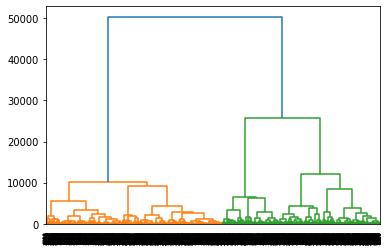

[0 0 0 ... 1 0 0]
0       no
1       no
2       no
3       no
4       no
        ..
4516    no
4517    no
4518    no
4519    no
4520    no
Name: y, Length: 4521, dtype: object


In [3]:
clk_id = time.CLOCK_REALTIME 

t1 = time.clock_gettime(clk_id)
model=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward',compute_full_tree=False)


model.fit(X)

purity(y,model.labels_)

t2 = time.clock_gettime(clk_id)
print("cost_time = " + str(t2 - t1))
dis=sch.linkage(X,metric='euclidean',method='ward')

sch.dendrogram(dis)
plt.show()
print(model.labels_)
print(y)
